In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [2]:
# SQL Connection
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)

In [3]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [5]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
data = engine.execute("select * from measurement limit 5").fetchall()
for x in data:
    print(x)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)


In [7]:
# Reflect Database into ORM class
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Precipitation Analysis

In [11]:
# Last Date
last_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first().date
last_date

'2017-08-23'

In [12]:
past12mth_date = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
past12mth_date

datetime.datetime(2016, 8, 23, 0, 0)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prec_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= past12mth_date).\
    group_by(Measurement.date).all()         
print(prec_results)


[('2016-08-24', 1.45), ('2016-08-25', 0.11), ('2016-08-26', 0.01), ('2016-08-27', None), ('2016-08-28', 2.07), ('2016-08-29', 0.9), ('2016-08-30', 0.05), ('2016-08-31', 2.46), ('2016-09-01', 0.01), ('2016-09-02', 0.03), ('2016-09-03', 1.0), ('2016-09-04', 0.44), ('2016-09-05', 0.18), ('2016-09-06', 1.0), ('2016-09-07', 1.35), ('2016-09-08', 0.15), ('2016-09-09', 0.35), ('2016-09-10', 1.16), ('2016-09-11', 0.6), ('2016-09-12', 1.04), ('2016-09-13', 1.2), ('2016-09-14', 6.7), ('2016-09-15', 3.35), ('2016-09-16', 0.61), ('2016-09-17', 0.23), ('2016-09-18', 0.42), ('2016-09-19', 0.25), ('2016-09-20', 0.43), ('2016-09-21', 1.02), ('2016-09-22', 0.75), ('2016-09-23', 0.33), ('2016-09-24', 0.27), ('2016-09-25', 0.04), ('2016-09-26', 1.02), ('2016-09-27', 1.0), ('2016-09-28', 0.05), ('2016-09-29', 1.49), ('2016-09-30', 0.38), ('2016-10-01', 1.02), ('2016-10-02', 0.61), ('2016-10-03', 0.46), ('2016-10-04', 3.46), ('2016-10-05', 0.81), ('2016-10-06', 0.04), ('2016-10-07', 0.01), ('2016-10-08', 0

In [14]:
#Pandas DataFrame for data and precipitation scores for the last 12 months
prec_df = pd.DataFrame(prec_results, columns=['Date', 'Precipitation'])
prec_df = prec_df.set_index('Date')
prec_df.head()

,Precipitation
Date,
2016-08-24,1.45
2016-08-25,0.11
2016-08-26,0.01
2016-08-27,NaN
2016-08-28,2.07


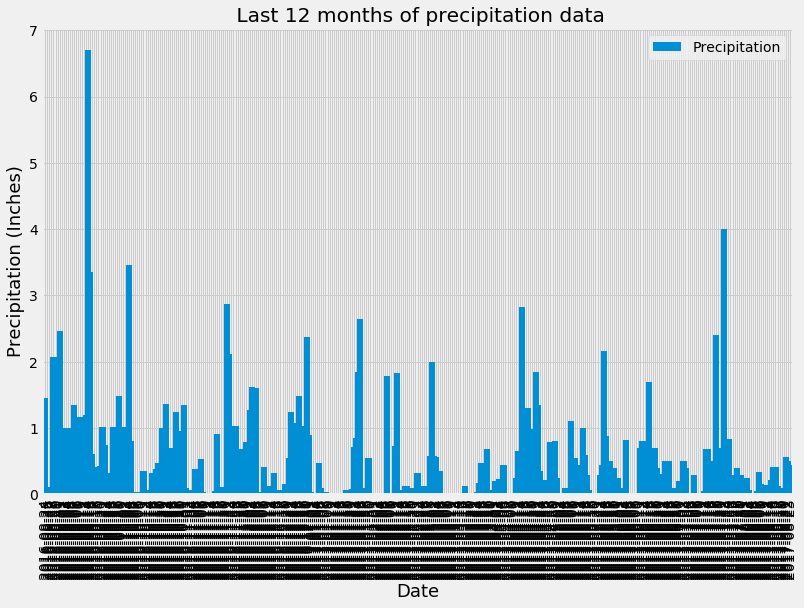

In [34]:
#Plot the results using the DataFrame `plot` method
prec_df.plot(kind="bar", width=3, figsize=(12,8),rot=90)
plt.title(" Last 12 months of precipitation data")
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.grid(True)
plt.savefig("Images/Precipitation1.png")
plt.show()
#plt.tight_layout()
#plt.savefig("Images/Precipitation1.png")


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data

prec_df.describe()

,Precipitation
count,344.000000
mean,0.431308
std,0.705240
min,0.000000
25%,0.010000
50%,0.140000
75%,0.565000
max,6.700000


### Station Analysis

In [17]:
data = engine.execute("select * from Station").fetchall()
data

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [18]:
# Design a query to show how many stations are available in this dataset?
station_ct = session.query(Station.station).count()
print(station_ct) 

9


In [19]:
station_nm = session.query(Station.name).all()
station_nm

[('WAIKIKI 717.2, HI US'),
 ('KANEOHE 838.1, HI US'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('PEARL CITY, HI US'),
 ('UPPER WAHIAWA 874.3, HI US'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('WAIHEE 837.5, HI US'),
 ('HONOLULU OBSERVATORY 702.2, HI US'),
 ('MANOA LYON ARBO 785.2, HI US')]

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
active_station    



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
most_active_st = active_station[0][0]
most_active_st

'USC00519281'

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_station = session.query(Measurement.station,
                               func.min(Measurement.tobs),
                               func.max(Measurement.tobs),  
                               func.avg(Measurement.tobs)).\
            filter(Measurement.station == most_active_st).all()
temp_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highT_station = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == most_active_st).\
                filter(Measurement.date >= past12mth_date).all()
   
highT_station_df = pd.DataFrame(highT_station, columns=['Station', 'Tobs'])
highT_station_df = highT_station_df.set_index('Station')
highT_station_df.head()

,Tobs
Station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


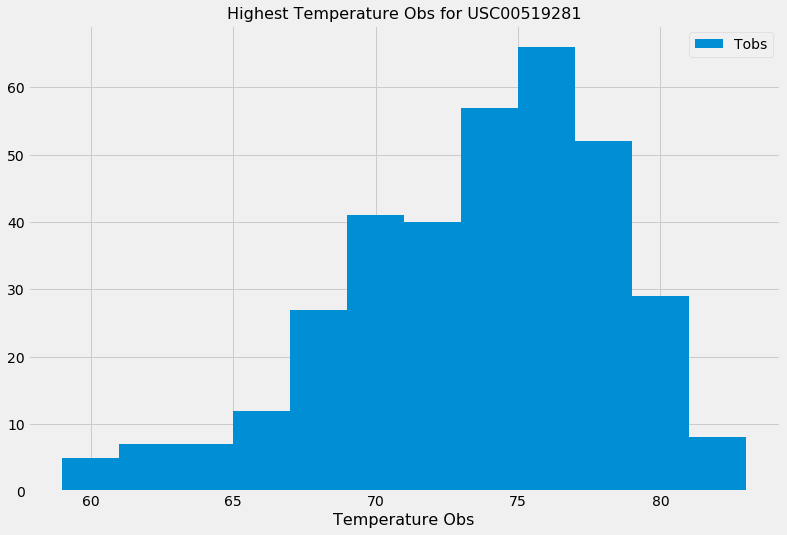

In [30]:
highT_station_df.hist(bins=12, figsize=(12,8),label = 'Tobs')
plt.grid(True)
plt.title("Highest Temperature Obs for " + most_active_st,fontsize=16)
plt.xlabel("Temperature Obs", fontsize=16)
plt.legend(loc='upper right')
plt.show
plt.savefig("Images/hightemperature.png")

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    temp_results = session.query(func.min(Measurement.tobs),
                              func.avg(Measurement.tobs),
                              func.max(Measurement.tobs)).\
               filter(Measurement.date >= start_date).\
               filter(Measurement.date <= end_date).all() 
    return temp_results
                                 
calc_temps('2017-01-01', '2017-08-00')

[(58.0, 73.8177641653905, 87.0)]

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


# Step 2 - Climate App

In [ ]:
app = Flask(__name__)

In [ ]:
@app.route("/")
def welcome1():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation1<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/<start_date>/<end_date>"
    )

In [ ]:
@app.route("/api/v1.0/precipitation1")
def precipitation1():
    last_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first().date
    past12mth_date = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)


    tobs_results = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= past12mth_date).\
        group_by(Measurement.date).all()  

    
    temp_dict = [{element[0]:element[1]} for element in tobs_results]
        
    return  jsonify(temp_dict) 
    

In [ ]:
@app.route("/api/v1.0/stations")
def stations():
    station_nm = session.query(Station.station,Station.name).all()
    return jsonify(station_nm)

In [ ]:
@app.route("/api/v1.0/<start_date>/<end_date>")
def start_end1(start_date,end_date):
    temp_results = session.query(func.min(Measurement.tobs),
                            func.avg(Measurement.tobs),
                            func.max(Measurement.tobs)).\
            filter(Measurement.date >= start_date).\
            filter(Measurement.date <= end_date).all() 
    return jsonify(temp_results)
     